# Description

Team Name: Pioneers

Team Members: 

Tulasi Aruna Kumari Dhupam

Prithika Rajidi

Mounika Daggubai

Bhargav Krishna boddupalli

Bharath Kumar Pamidala


Model : Multiple Linear Regression 

Source Links :


[1]. https://scikit-learn.org/stable/modules/preprocessing.html

[2].https://scikit-learn.org/stable/modules/preprocessing.html#mapping-to-a-gaussian-distribution

[3]. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

[4]. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

[5]. https://www.tensorflow.org/api_docs/python/tf/image/resize

[6].https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

[7].https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

[8].https://stackoverflow.com/questions/42592493/displaying-pair-plot-in-pandas-data-frame#

[9].https://levelup.gitconnected.com/pearson-coefficient-of-correlation-using-pandas-ca68ce678c04

[10].https://www.ideaconnection.com/syngenta-crop-challenge/challenge.php/



# Description

The main objective is to consistently analyze production of crop in tons based on continues observation on area(hect) of crop in every state yearly.

In [4]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import scipy as pearsonr
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [18]:
# import and reading dataset
crop= pd.read_excel('DATASET.xlsx',engine='openpyxl')

crop

,year,State,Area(hect),Production(tons),yield(kg/hect)
0,1974,Andhra Pradesh,3553.5,5700.3,1604.0
1,1975,Andhra Pradesh,3894.5,6451.3,1657.0
2,1976,Andhra Pradesh,3565.2,4929.7,1383.0
3,1977,Andhra Pradesh,3662.3,5604.7,1530.0
4,1978,Andhra Pradesh,3979.1,7432.2,1868.0
...,...,...,...,...,...
1311,2016,DAMAN AND DIU,NaN,NaN,NaN
1312,2017,DAMAN AND DIU,NaN,NaN,NaN
1313,2018,DAMAN AND DIU,NaN,NaN,NaN
1314,2019,DAMAN AND DIU,NaN,NaN,NaN


In [19]:
#check the number of samples
print(type(crop))
print(crop.shape)

<class 'pandas.core.frame.DataFrame'>
(1316, 5)


# Output

We have 729 samples with 5 features

In [20]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              1316 non-null   int64  
 1   State             1316 non-null   object 
 2   Area(hect)        771 non-null    float64
 3   Production(tons)  771 non-null    float64
 4   yield(kg/hect)    771 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 51.5+ KB


# Output

Year as int datatype with no null values

State as object data type with no null values

Area(hect) as float data type , 728 with samples no null values

Production(tons) as float data type with no null values

yield(kg/hect) as float data type with no null values

In [21]:
# Count of duplicates values and removing duplicates
crop.drop_duplicates()

,year,State,Area(hect),Production(tons),yield(kg/hect)
0,1974,Andhra Pradesh,3553.5,5700.3,1604.0
1,1975,Andhra Pradesh,3894.5,6451.3,1657.0
2,1976,Andhra Pradesh,3565.2,4929.7,1383.0
3,1977,Andhra Pradesh,3662.3,5604.7,1530.0
4,1978,Andhra Pradesh,3979.1,7432.2,1868.0
...,...,...,...,...,...
1311,2016,DAMAN AND DIU,NaN,NaN,NaN
1312,2017,DAMAN AND DIU,NaN,NaN,NaN
1313,2018,DAMAN AND DIU,NaN,NaN,NaN
1314,2019,DAMAN AND DIU,NaN,NaN,NaN


# Output

Displayed 728 samples after dropping the 1 duplicate sample 

In [22]:
#Drop the rows where at least one element is missing.
crop.dropna()

,year,State,Area(hect),Production(tons),yield(kg/hect)
0,1974,Andhra Pradesh,3553.5,5700.3,1604.0
1,1975,Andhra Pradesh,3894.5,6451.3,1657.0
2,1976,Andhra Pradesh,3565.2,4929.7,1383.0
3,1977,Andhra Pradesh,3662.3,5604.7,1530.0
4,1978,Andhra Pradesh,3979.1,7432.2,1868.0
...,...,...,...,...,...
1290,1995,DAMAN AND DIU,2.0,2.9,1450.0
1291,1996,DAMAN AND DIU,2.0,2.9,1450.0
1292,1997,DAMAN AND DIU,2.0,2.9,1450.0
1293,1998,DAMAN AND DIU,2.0,3.3,1650.0


# Output

Displayed 728 samples after dropping the 1 missing sample 

In [23]:
# Getting the min, max, Q1 and Q2 
crop.describe()

,year,Area(hect),Production(tons),yield(kg/hect)
count,1316.000000,771.000000,771.000000,771.000000
mean,1997.000000,1495.253696,2409.520882,1605.567003
std,13.569817,1901.429777,3163.095972,634.469778
min,1974.000000,1.100000,1.600000,309.000000
25%,1985.000000,92.450000,111.650000,1121.000000
50%,1997.000000,303.500000,556.600000,1463.000000
75%,2009.000000,2334.050000,4240.250000,2012.500000
max,2020.000000,6176.000000,13951.000000,3579.000000


# Output

Minimum values of year = 1974 , Area(hect) = 1.1 , Production(tons) = 1.6 and yield(kg/hect) = 309

Maximum values of year = 1999 , Area(hect) = 6176 , production(tons) = 13951 and yield(kg/hect) = 3759

Q1 values of year = 1980 ,  Area(hect) = 88.60 , production(tons) = 110.7 and yield(kg/hect) = 1126

Q2 values of year = 1986 ,  Area(hect) = 302.95 , production(tons) = 556.6 and yield(kg/hect) = 1463


In [24]:
crop1 = crop.copy()
crop1

,year,State,Area(hect),Production(tons),yield(kg/hect)
0,1974,Andhra Pradesh,3553.5,5700.3,1604.0
1,1975,Andhra Pradesh,3894.5,6451.3,1657.0
2,1976,Andhra Pradesh,3565.2,4929.7,1383.0
3,1977,Andhra Pradesh,3662.3,5604.7,1530.0
4,1978,Andhra Pradesh,3979.1,7432.2,1868.0
...,...,...,...,...,...
1311,2016,DAMAN AND DIU,NaN,NaN,NaN
1312,2017,DAMAN AND DIU,NaN,NaN,NaN
1313,2018,DAMAN AND DIU,NaN,NaN,NaN
1314,2019,DAMAN AND DIU,NaN,NaN,NaN


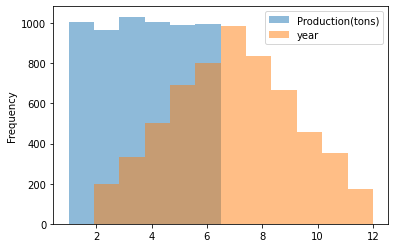

In [25]:
#Getting the data using histogram
crop = pd.DataFrame(np.random.randint(1, 7, 6000),columns = ['Production(tons)'])
crop['year'] = crop['Production(tons)']+ np.random.randint(1, 7, 6000)
ax = crop.plot.hist(bins=12, alpha=0.5)

# Output
Comparing the production(tons) and year in the histogram plotting


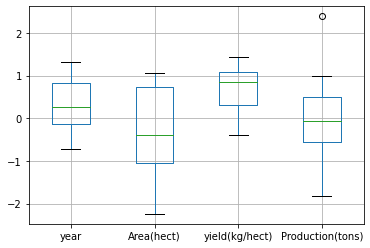

In [26]:
#Getting the data using box-plot
np.random.seed(1234)
crop = pd.DataFrame(np.random.randn(10, 4),
                  columns=['year', 'Area(hect)', 'yield(kg/hect)', 'Production(tons)'])
boxplot = crop.boxplot(column=['year', 'Area(hect)', 'yield(kg/hect)','Production(tons)'])
#boxplot = crop.boxplot(grid=False, rot=45, fontsize=15) 

# Output

We have one outlier in the production(tons).  Average year is greater than 0 , yield(kg/hect) is near to 1 , Area(hect) and Production(tons) is less than 0.

In [27]:
# Getting the data using pearson correlation
pearsoncorr = crop.corr(method='pearson')
pearsoncorr


,year,Area(hect),yield(kg/hect),Production(tons)
year,1.000000,-0.215849,0.024679,-0.376875
Area(hect),-0.215849,1.000000,-0.044028,-0.225721
yield(kg/hect),0.024679,-0.044028,1.000000,-0.162196
Production(tons),-0.376875,-0.225721,-0.162196,1.000000


# Output

Production(tons) and year are correlated to each other with corr value 1

<AxesSubplot:>

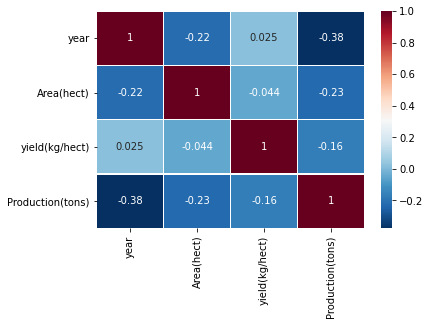

In [28]:
# Getting plotted data using person correlation
sns.heatmap(pearsoncorr, 
           xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)



# Output

Year and Production(tons) are increasing correspondingly when the area(hect) increasing

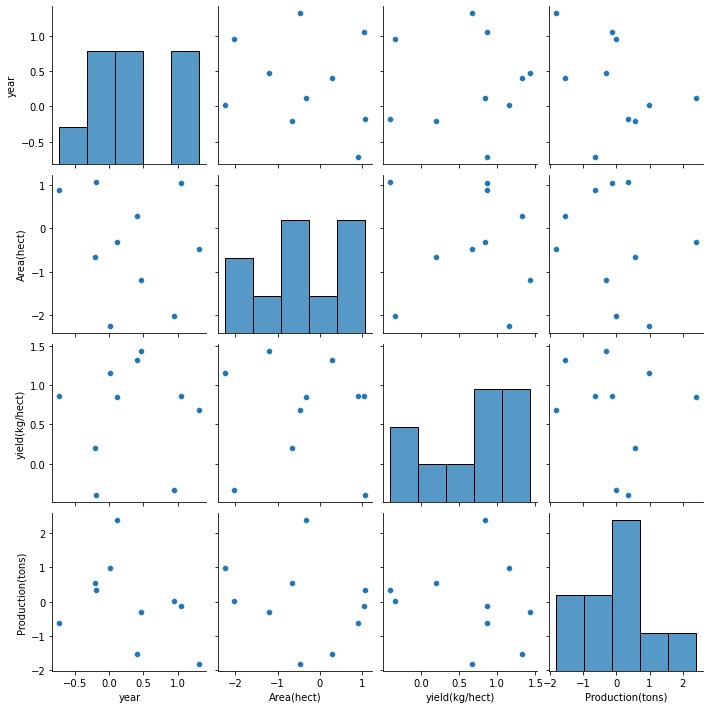

In [29]:
# Getting plotted data using pairplot
sns.pairplot(crop)

# Output

When the Area(hect) is increasing the production(tons) is also increasing correspondingly. 

In [30]:
# Normalizing the data
crop1["output"] = (crop1["Production(tons)"] - min(crop1["Production(tons)"]))/(max(crop1["Production(tons)"])-min(crop1["Production(tons)"]))
                                                                        

In [31]:
crop1["Production(tons)"]

0       5700.3
1       6451.3
2       4929.7
3       5604.7
4       7432.2
         ...  
1311       NaN
1312       NaN
1313       NaN
1314       NaN
1315       NaN
Name: Production(tons), Length: 1316, dtype: float64

In [32]:
crop1

,year,State,Area(hect),Production(tons),yield(kg/hect),output
0,1974,Andhra Pradesh,3553.5,5700.3,1604.0,0.408527
1,1975,Andhra Pradesh,3894.5,6451.3,1657.0,0.462364
2,1976,Andhra Pradesh,3565.2,4929.7,1383.0,0.353284
3,1977,Andhra Pradesh,3662.3,5604.7,1530.0,0.401673
4,1978,Andhra Pradesh,3979.1,7432.2,1868.0,0.532682
...,...,...,...,...,...,...
1311,2016,DAMAN AND DIU,NaN,NaN,NaN,NaN
1312,2017,DAMAN AND DIU,NaN,NaN,NaN,NaN
1313,2018,DAMAN AND DIU,NaN,NaN,NaN,NaN
1314,2019,DAMAN AND DIU,NaN,NaN,NaN,NaN


# Output

We have changed the range of data from 0 to 1 by normalizing  the production(tons) columns.

In [33]:
# Encoding the onehot encoder and label encoder

encoder = LabelEncoder()
encoder.fit(crop1['State'])
values = encoder.transform(crop1['State'])

oh_encoder = OneHotEncoder()
c_reshaped = np.array(crop1['State']).reshape(-1, 1)
new_values = oh_encoder.fit_transform(c_reshaped)

In [34]:
new_df = pd.get_dummies(crop1, columns=['State'])
new_df

,year,Area(hect),Production(tons),yield(kg/hect),output,State_ANDAMAN & NICOBAR,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,...,State_MIZORAM,State_NAGALAND,State_ORISSA,State_PUNJAB,State_RAJASTHAN,State_SIKKIM,State_TAMILNADU,State_TRIPURA,State_UTTAR PRADESH,State_WEST BENGAL
0,1974,3553.5,5700.3,1604.0,0.408527,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1975,3894.5,6451.3,1657.0,0.462364,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1976,3565.2,4929.7,1383.0,0.353284,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1977,3662.3,5604.7,1530.0,0.401673,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1978,3979.1,7432.2,1868.0,0.532682,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,2016,NaN,NaN,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1312,2017,NaN,NaN,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1313,2018,NaN,NaN,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1314,2019,NaN,NaN,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Output
We are encoding the samples of state feature to 1 and 0

In [35]:
# standard scaling
scaled_features = StandardScaler().fit_transform(new_df.values)
scaled_features_df = pd.DataFrame(scaled_features, index=new_df.index, columns=new_df.columns)

In [36]:
scaled_features_df

,year,Area(hect),Production(tons),yield(kg/hect),output,State_ANDAMAN & NICOBAR,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,...,State_MIZORAM,State_NAGALAND,State_ORISSA,State_PUNJAB,State_RAJASTHAN,State_SIKKIM,State_TAMILNADU,State_TRIPURA,State_UTTAR PRADESH,State_WEST BENGAL
0,-1.695582,1.083176,1.041042,-0.002471,1.041042,-0.19245,5.196152,-0.19245,-0.19245,-0.19245,...,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245
1,-1.621862,1.262631,1.278622,0.081117,1.278622,-0.19245,5.196152,-0.19245,-0.19245,-0.19245,...,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245
2,-1.548141,1.089333,0.797262,-0.351020,0.797262,-0.19245,5.196152,-0.19245,-0.19245,-0.19245,...,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245
3,-1.474420,1.140433,1.010799,-0.119180,1.010799,-0.19245,5.196152,-0.19245,-0.19245,-0.19245,...,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245
4,-1.400699,1.307152,1.588930,0.413894,1.588930,-0.19245,5.196152,-0.19245,-0.19245,-0.19245,...,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,1.400699,NaN,NaN,NaN,NaN,-0.19245,-0.192450,-0.19245,-0.19245,-0.19245,...,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245
1312,1.474420,NaN,NaN,NaN,NaN,-0.19245,-0.192450,-0.19245,-0.19245,-0.19245,...,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245
1313,1.548141,NaN,NaN,NaN,NaN,-0.19245,-0.192450,-0.19245,-0.19245,-0.19245,...,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245
1314,1.621862,NaN,NaN,NaN,NaN,-0.19245,-0.192450,-0.19245,-0.19245,-0.19245,...,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245


In [37]:
scaled_features_df.corr()

,year,Area(hect),Production(tons),yield(kg/hect),output,State_ANDAMAN & NICOBAR,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,...,State_MIZORAM,State_NAGALAND,State_ORISSA,State_PUNJAB,State_RAJASTHAN,State_SIKKIM,State_TAMILNADU,State_TRIPURA,State_UTTAR PRADESH,State_WEST BENGAL
year,1.000000e+00,0.056965,0.217720,0.275289,0.217720,1.345597e-17,-2.910539e-18,-2.826176e-18,-2.783994e-18,4.007264e-18,...,1.345597e-17,1.345597e-17,2.121741e-17,4.007264e-18,-2.783994e-18,4.007264e-18,-2.783994e-18,-2.783994e-18,-2.783994e-18,4.007264e-18
Area(hect),5.696517e-02,1.000000,0.880578,0.006383,0.880578,-1.458338e-01,3.033611e-01,-1.866571e-01,7.831664e-02,3.511968e-01,...,-1.414343e-01,-1.356989e-01,2.837935e-01,1.568620e-02,-1.321555e-01,-1.454213e-01,7.463834e-02,-1.202721e-01,3.756752e-01,3.927328e-01
Production(tons),2.177200e-01,0.880578,1.000000,0.345283,1.000000,-1.409801e-01,4.867131e-01,-1.850785e-01,1.383334e-02,1.783521e-01,...,-1.388025e-01,-1.351207e-01,1.436493e-01,1.679593e-01,-1.327608e-01,-1.413249e-01,1.939332e-01,-1.175602e-01,3.269587e-01,4.124850e-01
yield(kg/hect),2.752886e-01,0.006383,0.345283,1.000000,0.345283,1.156798e-01,2.522800e-01,-2.016169e-01,-1.354155e-01,-1.573984e-01,...,-1.591208e-01,-1.667813e-01,-1.489787e-01,4.327828e-01,-1.586562e-01,-1.419964e-01,2.800503e-01,-1.197499e-02,-4.012364e-02,2.426471e-02
output,2.177200e-01,0.880578,1.000000,0.345283,1.000000,-1.409801e-01,4.867131e-01,-1.850785e-01,1.383334e-02,1.783521e-01,...,-1.388025e-01,-1.351207e-01,1.436493e-01,1.679593e-01,-1.327608e-01,-1.413249e-01,1.939332e-01,-1.175602e-01,3.269587e-01,4.124850e-01
State_ANDAMAN & NICOBAR,1.345597e-17,-0.145834,-0.140980,0.115680,-0.140980,1.000000e+00,-3.703704e-02,-3.703704e-02,-3.703704e-02,-3.703704e-02,...,-3.703704e-02,-3.703704e-02,-3.703704e-02,-3.703704e-02,-3.703704e-02,-3.703704e-02,-3.703704e-02,-3.703704e-02,-3.703704e-02,-3.703704e-02
State_Andhra Pradesh,-2.910539e-18,0.303361,0.486713,0.252280,0.486713,-3.703704e-02,1.000000e+00,-3.703704e-02,-3.703704e-02,-3.703704e-02,...,-3.703704e-02,-3.703704e-02,-3.703704e-02,-3.703704e-02,-3.703704e-02,-3.703704e-02,-3.703704e-02,-3.703704e-02,-3.703704e-02,-3.703704e-02
State_Arunachal Pradesh,-2.826176e-18,-0.186657,-0.185078,-0.201617,-0.185078,-3.703704e-02,-3.703704e-02,1.000000e+00,-3.703704e-02,-3.703704e-02,...,-3.703704e-02,-3.703704e-02,-3.703704e-02,-3.703704e-02,-3.703704e-02,-3.703704e-02,-3.703704e-02,-3.703704e-02,-3.703704e-02,-3.703704e-02
State_Assam,-2.783994e-18,0.078317,0.013833,-0.135416,0.013833,-3.703704e-02,-3.703704e-02,-3.703704e-02,1.000000e+00,-3.703704e-02,...,-3.703704e-02,-3.703704e-02,-3.703704e-02,-3.703704e-02,-3.703704e-02,-3.703704e-02,-3.703704e-02,-3.703704e-02,-3.703704e-02,-3.703704e-02
State_Bihar,4.007264e-18,0.351197,0.178352,-0.157398,0.178352,-3.703704e-02,-3.703704e-02,-3.703704e-02,-3.703704e-02,1.000000e+00,...,-3.703704e-02,-3.703704e-02,-3.703704e-02,-3.703704e-02,-3.703704e-02,-3.703704e-02,-3.703704e-02,-3.703704e-02,-3.703704e-02,-3.703704e-02


In [38]:
scaled_features_df.dropna(inplace = True)

In [39]:
from sklearn.model_selection import train_test_split
x,y = scaled_features_df.drop(['Production(tons)', 'output'], axis=1), scaled_features_df['output']

In [40]:
x

,year,Area(hect),yield(kg/hect),State_ANDAMAN & NICOBAR,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,State_DADRA AND NAGAR,State_DAMAN AND DIU,...,State_MIZORAM,State_NAGALAND,State_ORISSA,State_PUNJAB,State_RAJASTHAN,State_SIKKIM,State_TAMILNADU,State_TRIPURA,State_UTTAR PRADESH,State_WEST BENGAL
0,-1.695582,1.083176,-0.002471,-0.19245,5.196152,-0.19245,-0.19245,-0.19245,-0.19245,-0.192450,...,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245
1,-1.621862,1.262631,0.081117,-0.19245,5.196152,-0.19245,-0.19245,-0.19245,-0.19245,-0.192450,...,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245
2,-1.548141,1.089333,-0.351020,-0.19245,5.196152,-0.19245,-0.19245,-0.19245,-0.19245,-0.192450,...,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245
3,-1.474420,1.140433,-0.119180,-0.19245,5.196152,-0.19245,-0.19245,-0.19245,-0.19245,-0.192450,...,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245
4,-1.400699,1.307152,0.413894,-0.19245,5.196152,-0.19245,-0.19245,-0.19245,-0.19245,-0.192450,...,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,-0.147442,-0.785842,-0.245351,-0.19245,-0.192450,-0.19245,-0.19245,-0.19245,-0.19245,5.196152,...,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245
1291,-0.073721,-0.785842,-0.245351,-0.19245,-0.192450,-0.19245,-0.19245,-0.19245,-0.19245,5.196152,...,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245
1292,0.000000,-0.785842,-0.245351,-0.19245,-0.192450,-0.19245,-0.19245,-0.19245,-0.19245,5.196152,...,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245
1293,0.073721,-0.785842,0.070077,-0.19245,-0.192450,-0.19245,-0.19245,-0.19245,-0.19245,5.196152,...,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245


In [41]:
y

0       1.041042
1       1.278622
2       0.797262
3       1.010799
4       1.588930
          ...   
1290   -0.761337
1291   -0.761337
1292   -0.761337
1293   -0.761211
1294   -0.761211
Name: output, Length: 771, dtype: float64

# Output
All the samples are distributed within the each feature with center around 0 and the standard deviation of 1

In [42]:
# break the data into two parts of train and test.
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [43]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)

y_predict = linear_regressor.predict(x_test)

In [44]:
len(x_train),len(y_train)

(578, 578)

In [45]:
x_test.shape,y_test.shape

((193, 31), (193,))

In [46]:
x_test

,year,Area(hect),yield(kg/hect),State_ANDAMAN & NICOBAR,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,State_DADRA AND NAGAR,State_DAMAN AND DIU,...,State_MIZORAM,State_NAGALAND,State_ORISSA,State_PUNJAB,State_RAJASTHAN,State_SIKKIM,State_TAMILNADU,State_TRIPURA,State_UTTAR PRADESH,State_WEST BENGAL
1091,-0.958373,2.110912,-0.481923,-0.19245,-0.19245,-0.192450,-0.192450,-0.192450,-0.19245,-0.192450,...,-0.192450,-0.192450,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,5.196152,-0.19245
151,-0.958373,1.903986,-0.896711,-0.19245,-0.19245,-0.192450,-0.192450,5.196152,-0.19245,-0.192450,...,-0.192450,-0.192450,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.192450,-0.19245
1277,-1.105815,-0.785684,-0.543431,-0.19245,-0.19245,-0.192450,-0.192450,-0.192450,-0.19245,5.196152,...,-0.192450,-0.192450,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.192450,-0.19245
587,0.000000,-0.009659,0.024340,-0.19245,-0.19245,-0.192450,-0.192450,-0.192450,-0.19245,-0.192450,...,-0.192450,-0.192450,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.192450,-0.19245
120,0.221163,0.430559,-0.363637,-0.19245,-0.19245,-0.192450,5.196152,-0.192450,-0.19245,-0.192450,...,-0.192450,-0.192450,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.192450,-0.19245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,-1.326978,-0.735110,-1.712094,-0.19245,-0.19245,-0.192450,-0.192450,-0.192450,-0.19245,-0.192450,...,-0.192450,5.196152,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.192450,-0.19245
716,-0.884652,-0.757950,-1.294151,-0.19245,-0.19245,-0.192450,-0.192450,-0.192450,-0.19245,-0.192450,...,5.196152,-0.192450,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.192450,-0.19245
334,-1.326978,-0.738531,-1.153785,-0.19245,-0.19245,-0.192450,-0.192450,-0.192450,-0.19245,-0.192450,...,-0.192450,-0.192450,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.192450,-0.19245
70,0.000000,-0.723743,-0.830471,-0.19245,-0.19245,5.196152,-0.192450,-0.192450,-0.19245,-0.192450,...,-0.192450,-0.192450,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.192450,-0.19245


In [47]:
x_test.iloc[:1,:].shape

(1, 31)

# Output

Splitted the data between train and test
x_train = 546 and y_train = 546
x_test = 182 and y_test = 182

In [48]:
# simple linear regression
print(mean_squared_error(y_test, y_predict))
print("Mean square root error", math.sqrt(mean_squared_error(y_test, y_predict)))
print("Mean absoulte error", mean_absolute_error(y_test, y_predict))
print("Coefficient of determination R^2: %.2f" % r2_score(y_test, y_predict))
print("R2 score",linear_regressor.score(x_test,y_test)*100)


0.03233914571205613
Mean square root error 0.17983088086326032
Mean absoulte error 0.12993494039159253
Coefficient of determination R^2: 0.96
R2 score 96.02218621653574


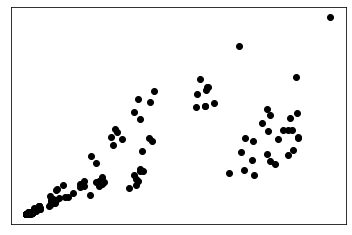

In [49]:
# Plot outputs
plt.scatter(x_test.iloc[:,1], y_test, color="black")

#plt.plot(x_test.iloc[:,1], y_test, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

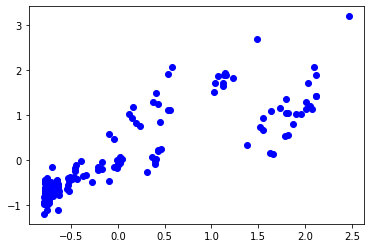

In [50]:
plt.scatter(x_test.iloc[:,1], y_predict, color="blue", linewidth=1)

In [53]:
############################ Different Splitting Strategy ##################################
splits = 5
SEED = 43
from sklearn.model_selection import cross_val_score, KFold, StratifiedShuffleSplit, StratifiedKFold
x_train, x_test, y_train, y_test = train_test_split(x, y )

linear_regressor = LinearRegression()
scores = cross_val_score(linear_regressor, x_train, y_train, scoring='r2', cv=5)
print(scores)

folds = KFold(n_splits = splits, shuffle = True, random_state = SEED)
scores = cross_val_score(linear_regressor, x_train, y_train, scoring='r2', cv=folds)
print(scores)


[0.97194267 0.97475448 0.95327757 0.95962844 0.96935596]
[0.97011625 0.96414578 0.95765518 0.96546139 0.97160219]


In [59]:
x

,year,Area(hect),yield(kg/hect),State_ANDAMAN & NICOBAR,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,State_DADRA AND NAGAR,State_DAMAN AND DIU,...,State_MIZORAM,State_NAGALAND,State_ORISSA,State_PUNJAB,State_RAJASTHAN,State_SIKKIM,State_TAMILNADU,State_TRIPURA,State_UTTAR PRADESH,State_WEST BENGAL
0,-1.695582,1.083176,-0.002471,-0.19245,5.196152,-0.19245,-0.19245,-0.19245,-0.19245,-0.192450,...,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245
1,-1.621862,1.262631,0.081117,-0.19245,5.196152,-0.19245,-0.19245,-0.19245,-0.19245,-0.192450,...,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245
2,-1.548141,1.089333,-0.351020,-0.19245,5.196152,-0.19245,-0.19245,-0.19245,-0.19245,-0.192450,...,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245
3,-1.474420,1.140433,-0.119180,-0.19245,5.196152,-0.19245,-0.19245,-0.19245,-0.19245,-0.192450,...,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245
4,-1.400699,1.307152,0.413894,-0.19245,5.196152,-0.19245,-0.19245,-0.19245,-0.19245,-0.192450,...,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,-0.147442,-0.785842,-0.245351,-0.19245,-0.192450,-0.19245,-0.19245,-0.19245,-0.19245,5.196152,...,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245
1291,-0.073721,-0.785842,-0.245351,-0.19245,-0.192450,-0.19245,-0.19245,-0.19245,-0.19245,5.196152,...,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245
1292,0.000000,-0.785842,-0.245351,-0.19245,-0.192450,-0.19245,-0.19245,-0.19245,-0.19245,5.196152,...,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245
1293,0.073721,-0.785842,0.070077,-0.19245,-0.192450,-0.19245,-0.19245,-0.19245,-0.19245,5.196152,...,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245,-0.19245


In [ ]:
############################ create new column ##################################
# Already created new column yield

In [54]:
############################ PCA #########################################
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,3.634438,0.076875,2.132967,2.644615,-0.035178,2.875130e-16,-9.564255e-16,1.405431e-16,-1.185624e-15,2.053999e-16,...,-1.723821e-15,2.109693e-16,-8.283847e-16,5.941450e-16,-4.665438e-16,-2.368775e-15,2.005226,-0.022577,0.021343,5.693104e-16
1,3.754797,0.109348,2.149521,2.578225,-0.034151,1.441979e-15,-2.149860e-15,9.912849e-16,-1.097936e-15,6.862401e-16,...,-5.342687e-16,5.718001e-16,-3.296590e-16,5.218435e-16,-1.054930e-15,-1.238871e-15,1.916957,0.012594,-0.102648,3.252227e-15
2,3.529851,0.260240,2.158095,2.743547,-0.035834,5.300067e-16,3.545471e-15,-1.881994e-15,-1.317928e-15,2.047969e-15,...,-2.142282e-15,-1.457228e-15,7.035891e-16,8.671872e-16,-4.064096e-15,-4.456182e-15,1.956347,-0.315365,0.008363,-3.238342e-15
3,3.638469,0.154800,2.181546,2.663185,-0.033431,-1.164372e-16,1.015142e-15,-7.698147e-17,-1.760319e-15,1.377380e-15,...,-1.815252e-15,-8.473614e-17,-1.151089e-15,2.872985e-16,-9.454439e-17,-2.444119e-15,1.836277,-0.186266,-0.019622,-6.745068e-16
4,3.905093,-0.060689,2.211469,2.468196,-0.029211,6.646124e-16,-4.579295e-16,3.178703e-16,-1.200161e-15,1.073771e-15,...,-1.317571e-16,6.425960e-16,-9.052515e-16,-3.382392e-16,-2.755460e-15,-1.700579e-15,1.643569,0.150820,-0.120502,1.553095e-15


In [58]:
explained_variance = pca.explained_variance_ratio_
list(map(float,explained_variance))


[0.07501518583649609,
 0.0627674718997582,
 0.05774852418138099,
 0.0461646343317721,
 0.03334719917694866,
 0.032194380429047736,
 0.032194380429047716,
 0.032194380429047716,
 0.03219438042904771,
 0.03219438042904771,
 0.03219438042904771,
 0.03219438042904771,
 0.03219438042904771,
 0.03219438042904771,
 0.03219438042904771,
 0.03219438042904771,
 0.0321943804290477,
 0.032194380429047695,
 0.032194380429047695,
 0.032194380429047695,
 0.032194380429047695,
 0.03219438042904768,
 0.03219438042904768,
 0.03219438042904768,
 0.03219438042904768,
 0.03219438042904766,
 0.03219438042904766,
 0.013691094090034297,
 0.002829620894906867,
 0.00015990014965368767,
 5.470360077869993e-33]

In [68]:
x_train.iloc[:,:2]

,year,Area(hect)
141,-1.695582,1.926404
1146,-0.368605,2.209901
22,-0.073721,1.375514
917,0.073721,-0.698430
257,-0.073721,-0.449035
...,...,...
540,0.000000,2.068969
1138,-0.958373,1.948876
706,-1.621862,-0.760792
776,0.073721,-0.710586


In [70]:
# first two columns year and area are playing a crucial role and are important

linear_regressor = LinearRegression()
linear_regressor.fit(x_train.iloc[:,:2], y_train)

y_predict = linear_regressor.predict(x_test.iloc[:,:2])

print(mean_squared_error(y_test, y_predict))
print("Mean square root error", math.sqrt(mean_squared_error(y_test, y_predict)))
print("Mean absoulte error", mean_absolute_error(y_test, y_predict))
print("Coefficient of determination R^2: %.2f" % r2_score(y_test, y_predict))
print("R2 score",linear_regressor.score(x_test.iloc[:,:2],y_test)*100)

0.20333213839157932
Mean square root error 0.45092365029079956
Mean absoulte error 0.30449741166057254
Coefficient of determination R^2: 0.79
R2 score 79.03547226690182


In [72]:
######################### Elasticnet Model #########################
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute, mean, std

model = ElasticNet(alpha=1.0, l1_ratio=0.5)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))


Mean MAE: 0.608 (0.069)


In [73]:
######################### Tuning Elasticnet Model Hyperparameters#########################
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute, mean, std, arange 
from sklearn.model_selection import GridSearchCV
model = ElasticNet()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = arange(0, 1, 0.01)

search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
results = search.fit(x_train, y_train)

print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.130
Config: {'alpha': 0.0001, 'l1_ratio': 0.93}


C:\Users\AG92031\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.884e-01, tolerance: 5.837e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Feature: 0, Score: 0.05800
Feature: 1, Score: 1.82539
Feature: 2, Score: 0.19896
Feature: 3, Score: -174706080854.17755
Feature: 4, Score: -174706080854.37476
Feature: 5, Score: -174706080854.14441
Feature: 6, Score: -174706080854.37943
Feature: 7, Score: -174706080854.70981
Feature: 8, Score: -174706080854.15326
Feature: 9, Score: -174706080854.15207
Feature: 10, Score: -174706080854.19199
Feature: 11, Score: -174706080854.18631
Feature: 12, Score: -174706080854.22458
Feature: 13, Score: -174706080854.14227
Feature: 14, Score: -174706080854.19400
Feature: 15, Score: -174706080854.24921
Feature: 16, Score: -174706080854.21371
Feature: 17, Score: -174706080854.74252
Feature: 18, Score: -174706080854.28427
Feature: 19, Score: -174706080854.17841
Feature: 20, Score: -174706080854.14218
Feature: 21, Score: -174706080854.13861
Feature: 22, Score: -174706080854.13504
Feature: 23, Score: -174706080854.61819
Feature: 24, Score: -174706080854.22830
Feature: 25, Score: -174706080854.14301
Featur

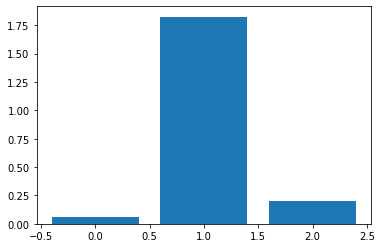

In [79]:
################################## Feature Importance Measurement ############################

# linear regression feature importance
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define the model
model = LinearRegression()
# fit the model
model.fit(x_train, y_train)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(3)], importance[:3])
pyplot.show()

In [83]:
crop

,year,Area(hect),yield(kg/hect),Production(tons)
0,0.471435,-1.190976,1.432707,-0.312652
1,-0.720589,0.887163,0.859588,-0.636524
2,0.015696,-2.242685,1.150036,0.991946
3,0.953324,-2.021255,-0.334077,0.002118
4,0.405453,0.289092,1.321158,-1.546906
5,-0.202646,-0.655969,0.193421,0.553439
6,1.318152,-0.469305,0.675554,-1.817027
7,-0.183109,1.058969,-0.397840,0.337438
8,1.047579,1.045938,0.863717,-0.122092
9,0.124713,-0.322795,0.841675,2.390961


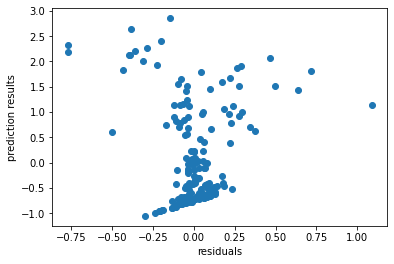

In [90]:
#################### Residual Plot ####################

linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)

y_predict = linear_regressor.predict(x_test)

residuals = y_predict - y_test
plt.scatter(residuals,y_predict)
plt.xlabel("residuals")
plt.ylabel("prediction results")

plt.show()


# Output
Predecting the dependent variable(y) values near to independent variables(x) in Linear regression model.

In [ ]:
# support vector regression
svr_regressor = SVR(kernel='rbf', gamma='auto')
svr_regressor.fit(x, y)

In [ ]:
svr_predict = svr_regressor.predict(x_test)

In [374]:
print("Mean squared error",mean_squared_error(y_test, svr_predict))
print("Mean square root error",math.sqrt(mean_squared_error(y_test, svr_predict)))
print("Mean absoulte error", mean_absolute_error(y_test, y_predict))
print("Coefficient of determination R^2: %.2f" % r2_score(y_test, svr_predict))
print("R2 score",svr_regressor.score(x_test,y_test)*100)

Mean squared error 0.011301117231723553
Mean square root error 0.10630671301344781
Mean absoulte error 0.1256289300071625
Coefficient of determination R^2: 0.99
R2 score 98.8880926074993


In [ ]:
# Plot outputs
plt.scatter(x_test.iloc[:,1], y_test, color="black")

#plt.plot(x_test.iloc[:,1], y_test, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
plt.scatter(x_test.iloc[:,1], svr_predict, color="blue", linewidth=1) 

In [74]:
############################## SVM Hyper Parameter Tuning ############################
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
svr_regressor = SVR()
grid = GridSearchCV(svr_regressor, param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(x_train, y_train)

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.532 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.574 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.574 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.641 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.656 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.794 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.781 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.799 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.838 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.861 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.759 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [75]:
svr_regressor = SVR(kernel='rbf', gamma=0.01, C=100)
svr_regressor.fit(x, y)
svr_predict = svr_regressor.predict(x_test)

In [76]:
print("Mean squared error",mean_squared_error(y_test, svr_predict))
print("Mean square root error",math.sqrt(mean_squared_error(y_test, svr_predict)))
print("Mean absoulte error", mean_absolute_error(y_test, y_predict))
print("Coefficient of determination R^2: %.2f" % r2_score(y_test, svr_predict))
print("R2 score",svr_regressor.score(x_test,y_test)*100)

Mean squared error 0.0030111738800561306
Mean square root error 0.05487416404881382
Mean absoulte error 0.30449741166057254
Coefficient of determination R^2: 1.00
R2 score 99.68953339685021


# Output
Predecting the dependent variable(y) values near to independent variables(x) in suport vector regression model.

In [ ]:
# decision tree regression
tree_regressor = DecisionTreeRegressor(random_state = 0)
tree_regressor.fit(x, y)

In [ ]:
tree_predict = tree_regressor.predict(x_test)

In [375]:
print("Mean squared error", mean_squared_error(y_test, tree_predict))
print("Mean square root error", math.sqrt(mean_squared_error(y_test, tree_predict)))
print("Mean absoulte error", mean_absolute_error(y_test, y_predict))
print("Coefficient of determination R^2: %.2f" % r2_score(y_test, tree_predict))
print("R2 score",svr_regressor.score(x_test,y_test)*100)

Mean squared error 2.031750271001919e-34
Mean square root error 1.425394777246612e-17
Mean absoulte error 0.1256289300071625
Coefficient of determination R^2: 1.00
R2 score 98.8880926074993


In [ ]:
# Plot outputs
plt.scatter(x_test.iloc[:,1], y_test, color="black")

#plt.plot(x_test.iloc[:,1], y_test, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
plt.scatter(x_test.iloc[:,1], tree_predict, color="blue", linewidth=1)

# Output

Predecting the dependent variable(y) values exactly with independent variables(x) in decission tree regression model.
After comparing all the three regressions, decision tree regression is the best model.